In [1]:
 #importing necessory librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Problem Statement

Food price volatility is a significant challenge in India, affecting both consumers and producers. This project aims to:

* Analyze historical food price trends across different states and markets.

* Identify price variations between regions and market types.

* Detect patterns of inflation or deflation over time.

* Compare INR prices with USD prices to understand currency impact.



# 1.Understand the Data

In [ ]:
df = pd.read_csv('/content/food_prices_ind - Copy.csv')
df

<ipython-input-9-0450a745ebbf>:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/food_prices_ind - Copy.csv')


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168491,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (soybean),KG,actual,Retail,INR,128.47,1.5502
168492,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (sunflower),KG,actual,Retail,INR,152.13,1.8357
168493,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils,KG,actual,Retail,INR,147.53,1.7802
168494,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.64,1.3592


In [ ]:
df.shape

(168496, 14)

In [ ]:
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168496 entries, 0 to 168495
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       168496 non-null  object
 1   admin1     167867 non-null  object
 2   admin2     167867 non-null  object
 3   market     168496 non-null  object
 4   latitude   167867 non-null  object
 5   longitude  167867 non-null  object
 6   category   168496 non-null  object
 7   commodity  168496 non-null  object
 8   unit       168496 non-null  object
 9   priceflag  168496 non-null  object
 10  pricetype  168496 non-null  object
 11  currency   168496 non-null  object
 12  price      168496 non-null  object
 13  usdprice   168496 non-null  object
dtypes: object(14)
memory usage: 18.0+ MB


In [ ]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
date,0
admin1,629
admin2,629
market,0
latitude,629
longitude,629
category,0
commodity,0
unit,0
priceflag,0


# 2.Data Cleaning

In [ ]:
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168490,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (soybean),KG,actual,Retail,INR,128.47,1.5502
168491,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (sunflower),KG,actual,Retail,INR,152.13,1.8357
168492,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils,KG,actual,Retail,INR,147.53,1.7802
168493,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.64,1.3592


In [ ]:
df.rename(columns={'admin1': 'State1'}, inplace=True)

<ipython-input-16-3d974ec5e37a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'admin1': 'State1'}, inplace=True)


In [ ]:
# df.rename(columns={'admin2': 'State2'}, inplace=True)

In [ ]:
df

,date,State1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168490,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (soybean),KG,actual,Retail,INR,128.47,1.5502
168491,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (sunflower),KG,actual,Retail,INR,152.13,1.8357
168492,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils,KG,actual,Retail,INR,147.53,1.7802
168493,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.64,1.3592


In [ ]:
df['currency'].value_counts()

,count
currency,
INR,168495


In [ ]:
df['category'].value_counts()

,count
category,
oil and fats,41728
cereals and tubers,39738
miscellaneous food,33668
pulses and nuts,28718
vegetables and fruits,16002
milk and dairy,8641


In [ ]:
df['pricetype'].value_counts()

,count
pricetype,
Retail,166602
Wholesale,1893


In [ ]:
df['priceflag'].value_counts()

,count
priceflag,
actual,168495


In [ ]:
df['unit'].value_counts()

,count
unit,
KG,157961
L,8641
100 KG,1893


In [ ]:
df = df.drop(['currency', 'priceflag', 'admin2', 'market'], axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(167866, 10)

In [ ]:
df

,date,State1,latitude,longitude,category,commodity,unit,pricetype,price,usdprice
0,1994-01-15,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,8.0,0.255
1,1994-01-15,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,13.5,0.4303
2,1994-01-15,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,31.0,0.988
3,1994-01-15,Gujarat,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.8,0.2167
4,1994-01-15,Gujarat,23.033333,72.616667,cereals and tubers,Wheat,KG,Retail,6.2,0.1976
...,...,...,...,...,...,...,...,...,...,...
168490,2024-01-15,Rajasthan,26.938848,75.800056,oil and fats,Oil (soybean),KG,Retail,128.47,1.5502
168491,2024-01-15,Rajasthan,26.938848,75.800056,oil and fats,Oil (sunflower),KG,Retail,152.13,1.8357
168492,2024-01-15,Rajasthan,26.938848,75.800056,pulses and nuts,Lentils,KG,Retail,147.53,1.7802
168493,2024-01-15,Rajasthan,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,Retail,112.64,1.3592


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167866 entries, 0 to 168494
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       167866 non-null  datetime64[ns]
 1   State1     167866 non-null  object        
 2   latitude   167866 non-null  float64       
 3   longitude  167866 non-null  float64       
 4   category   167866 non-null  object        
 5   commodity  167866 non-null  object        
 6   unit       167866 non-null  object        
 7   pricetype  167866 non-null  object        
 8   price      167866 non-null  float64       
 9   usdprice   167866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 14.1+ MB


In [ ]:
df

,date,State1,latitude,longitude,category,commodity,unit,pricetype,price,usdprice
0,1994-01-15,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,8.00,0.2550
1,1994-01-15,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,13.50,0.4303
2,1994-01-15,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,31.00,0.9880
3,1994-01-15,Gujarat,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.80,0.2167
4,1994-01-15,Gujarat,23.033333,72.616667,cereals and tubers,Wheat,KG,Retail,6.20,0.1976
...,...,...,...,...,...,...,...,...,...,...
168490,2024-01-15,Rajasthan,26.938848,75.800056,oil and fats,Oil (soybean),KG,Retail,128.47,1.5502
168491,2024-01-15,Rajasthan,26.938848,75.800056,oil and fats,Oil (sunflower),KG,Retail,152.13,1.8357
168492,2024-01-15,Rajasthan,26.938848,75.800056,pulses and nuts,Lentils,KG,Retail,147.53,1.7802
168493,2024-01-15,Rajasthan,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,Retail,112.64,1.3592


# 3.Descriptive Statistics

In [ ]:
df.describe()

,date,latitude,longitude,price,usdprice
count,167866,167866.000000,167866.000000,167866.000000,167866.000000
mean,2018-07-09 00:22:13.577972736,22.413607,80.250416,94.368096,1.402374
min,1994-01-15 00:00:00,8.506944,69.666690,2.500000,0.056700
25%,2016-02-15 00:00:00,18.866667,76.283333,27.342500,0.399900
50%,2020-06-15 00:00:00,23.350000,78.164070,51.000000,0.727700
75%,2022-03-15 00:00:00,26.644080,84.903620,107.000000,1.482500
max,2024-01-15 00:00:00,32.553589,94.116667,4910.000000,88.773000
std,NaN,6.184933,5.653595,220.735432,3.760357


# 4.Visualization of Data

<Axes: xlabel='date', ylabel='Count'>

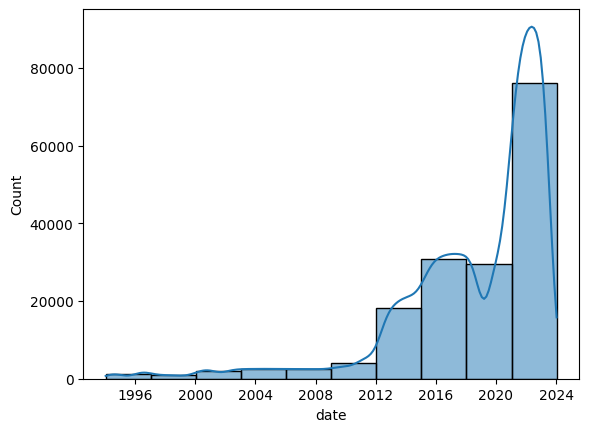

In [ ]:
sns.histplot(df['date'], bins=10, kde=True)

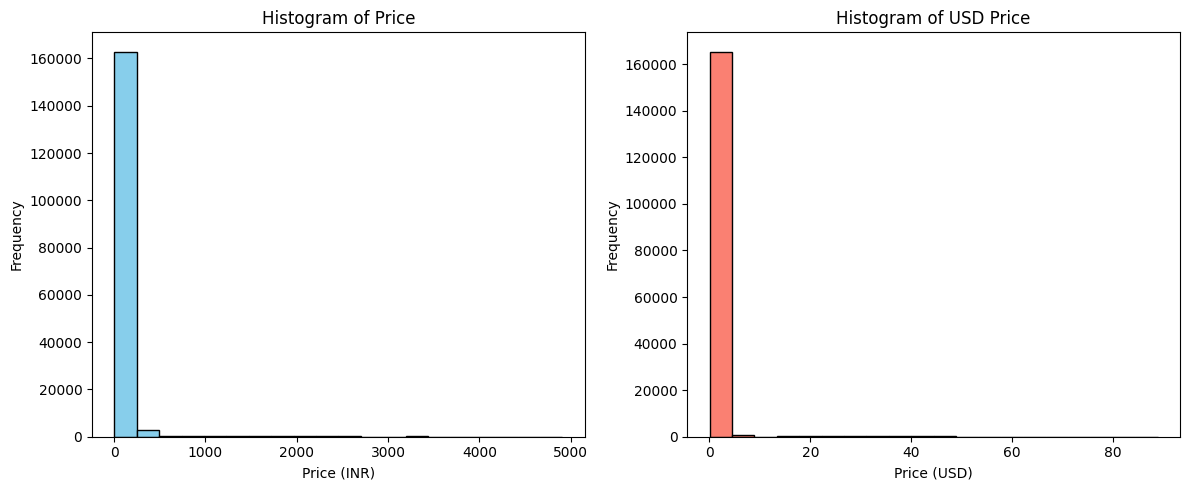

<Figure size 1200x600 with 0 Axes>

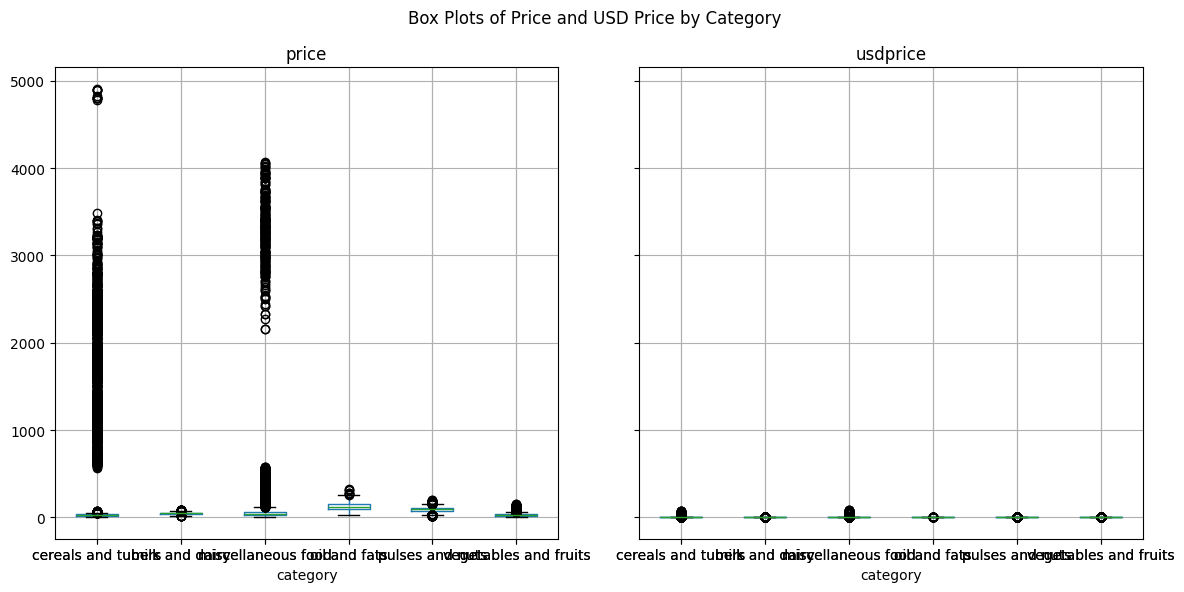

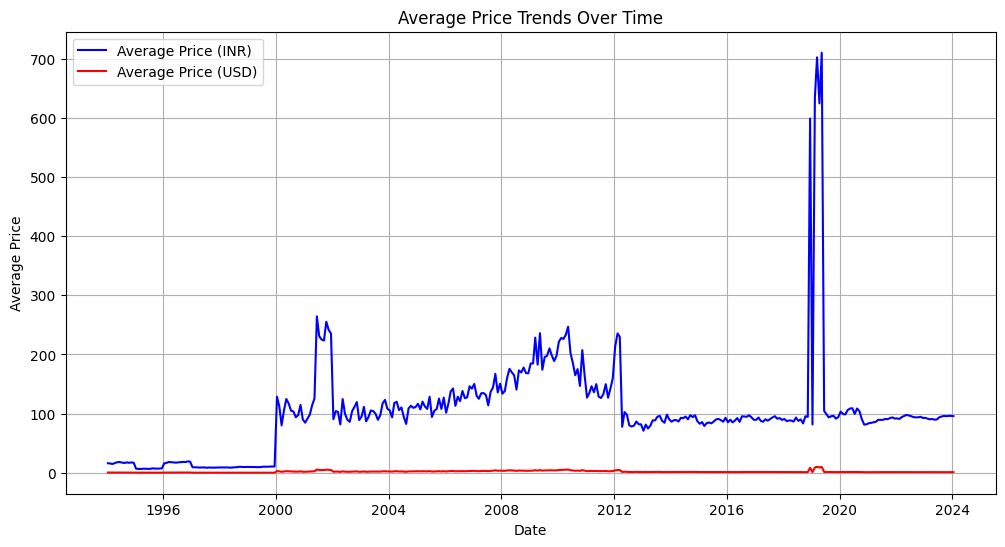

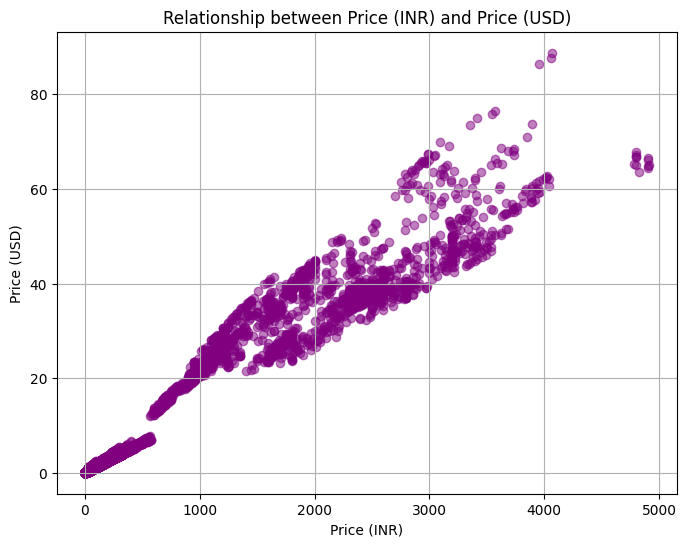

In [ ]:
 # Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.subplot(1, 2, 2)
plt.hist(df['usdprice'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of USD Price')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
df.boxplot(column=['price', 'usdprice'], by='category', figsize=(12, 6))
plt.suptitle('Box Plots of Price and USD Price by Category')
plt.tight_layout()
plt.show()

# Line plot of average price and usdprice over time
price_trends = df.groupby('date')[['price', 'usdprice']].mean()
plt.figure(figsize=(12, 6))
plt.plot(price_trends.index, price_trends['price'], label='Average Price (INR)', color='blue')
plt.plot(price_trends.index, price_trends['usdprice'], label='Average Price (USD)', color='red')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['usdprice'], alpha=0.5, color='purple')
plt.xlabel('Price (INR)')
plt.ylabel('Price (USD)')
plt.title('Relationship between Price (INR) and Price (USD)')
plt.grid(True)
plt.show()

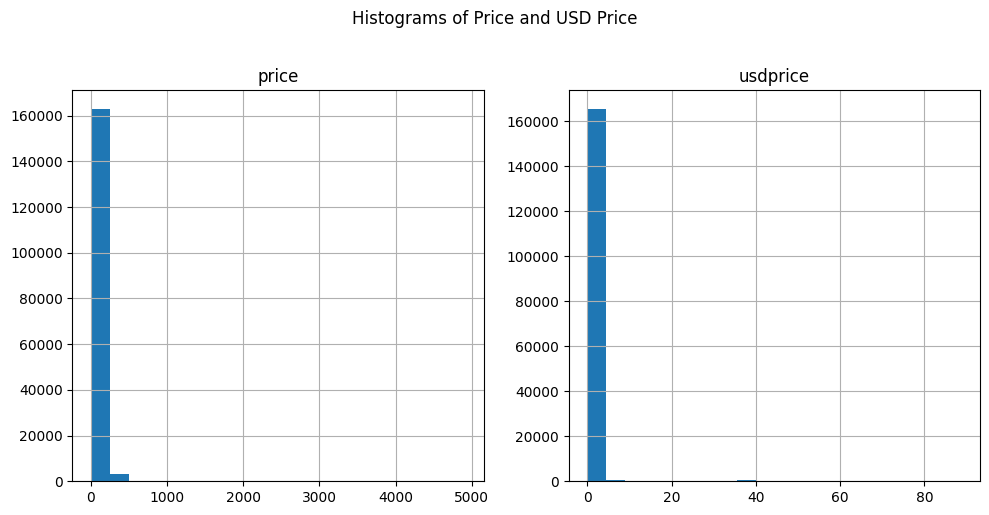

            latitude      longitude          price       usdprice
count  167866.000000  167866.000000  167866.000000  167866.000000
mean       22.413607      80.250416      94.368096       1.402374
std         6.184933       5.653595     220.735432       3.760357
min         8.506944      69.666690       2.500000       0.056700
25%        18.866667      76.283333      27.342500       0.399900
50%        23.350000      78.164070      51.000000       0.727700
75%        26.644080      84.903620     107.000000       1.482500
max        32.553589      94.116667    4910.000000      88.773000


In [ ]:
# Convert 'price' and 'usdprice' columns to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# Regenerate histograms
import matplotlib.pyplot as plt
df[['price', 'usdprice']].hist(figsize=(10, 5), bins=20)
plt.suptitle('Histograms of Price and USD Price', y=1.02)
plt.tight_layout()
plt.show()

# Recalculate descriptive statistics for numerical columns after type conversion
numerical_cols = ['latitude', 'longitude', 'price', 'usdprice']
print(df[numerical_cols].describe())

Descriptive Statistics:
                         price                                                \
                         count        mean         std    min    25%     50%   
category                                                                       
cereals and tubers     39635.0   94.116167  364.012161   2.81  18.21   25.00   
milk and dairy          8614.0   44.994641   10.359556  16.00  38.00   44.00   
miscellaneous food     33564.0  102.938044  283.901641   5.00  21.50   40.00   
oil and fats           41525.0  124.646158   41.798660  25.00  90.00  122.00   
pulses and nuts        28589.0   91.823883   23.252414  15.45  75.58   95.00   
vegetables and fruits  15939.0   29.312971   16.021467   2.50  18.83   25.75   

                                        usdprice                              \
                           75%      max    count      mean       std     min   
category                                                                       
cereals and tub

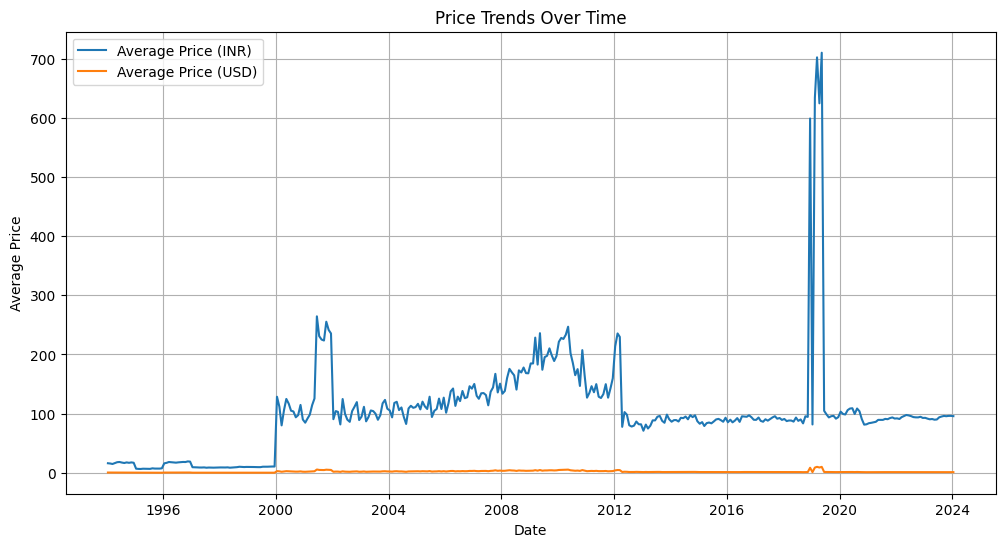


Correlation between 'price' and 'usdprice': 0.9803522646119929


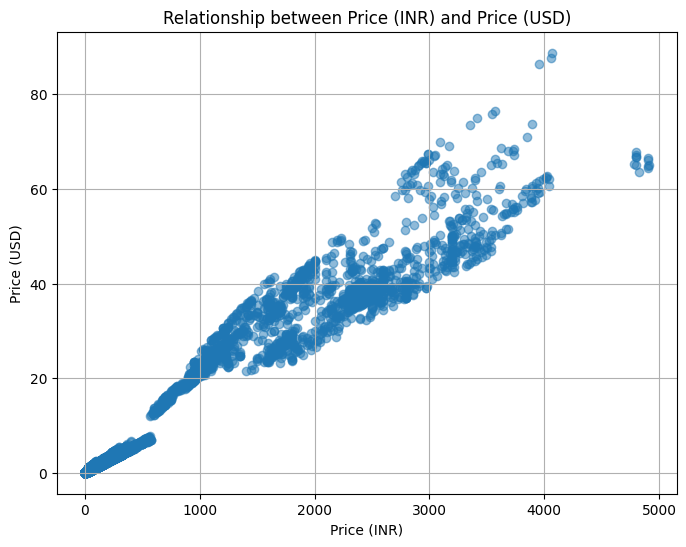

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.groupby([ 'category'])[['price', 'usdprice']].describe())

# Price Trends over Time
price_trends = df.groupby('date')[['price', 'usdprice']].mean()
plt.figure(figsize=(12, 6))
plt.plot(price_trends.index, price_trends['price'], label='Average Price (INR)')
plt.plot(price_trends.index, price_trends['usdprice'], label='Average Price (USD)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Price Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Relationship between 'price' and 'usdprice'
correlation = df['price'].corr(df['usdprice'])
print(f"\nCorrelation between 'price' and 'usdprice': {correlation}")

plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['usdprice'], alpha=0.5)
plt.xlabel('Price (INR)')
plt.ylabel('Price (USD)')
plt.title('Relationship between Price (INR) and Price (USD)')
plt.grid(True)
plt.show()

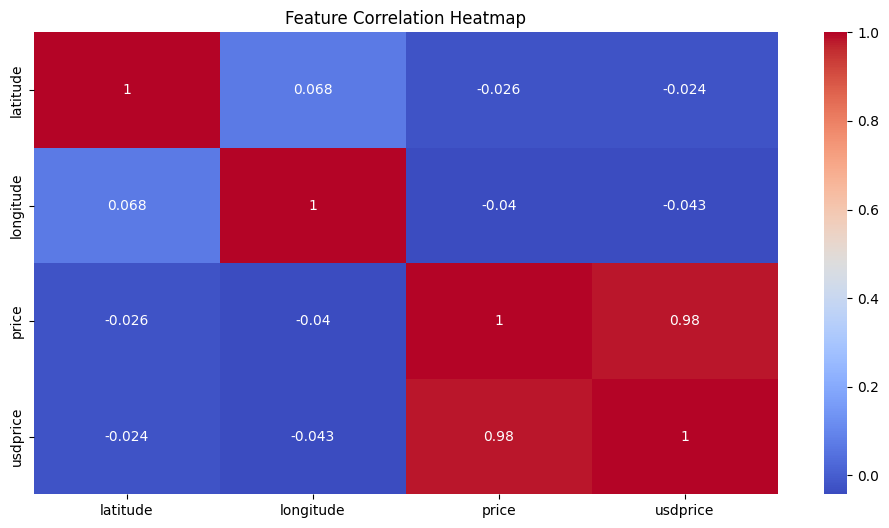

In [ ]:
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns for correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# df.to_csv('/content/food_prices_ind.csv', index=False) #saving code

In [ ]:
df

,date,State1,latitude,longitude,category,commodity,unit,pricetype,price,usdprice
0,1994-01-15,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,8.00,0.2550
1,1994-01-15,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,13.50,0.4303
2,1994-01-15,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,31.00,0.9880
3,1994-01-15,Gujarat,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.80,0.2167
4,1994-01-15,Gujarat,23.033333,72.616667,cereals and tubers,Wheat,KG,Retail,6.20,0.1976
...,...,...,...,...,...,...,...,...,...,...
168490,2024-01-15,Rajasthan,26.938848,75.800056,oil and fats,Oil (soybean),KG,Retail,128.47,1.5502
168491,2024-01-15,Rajasthan,26.938848,75.800056,oil and fats,Oil (sunflower),KG,Retail,152.13,1.8357
168492,2024-01-15,Rajasthan,26.938848,75.800056,pulses and nuts,Lentils,KG,Retail,147.53,1.7802
168493,2024-01-15,Rajasthan,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,Retail,112.64,1.3592


In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ['State1', 'category', 'commodity', 'unit', 'pricetype']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Scale numeric features
scaler = StandardScaler()
df[['latitude', 'longitude', 'price', 'usdprice']] = scaler.fit_transform(df[['latitude', 'longitude', 'price', 'usdprice']])


In [ ]:
# Scale numeric features
scaler = StandardScaler()
df[['State1', 'commodity', 'category']] = scaler.fit_transform(df[['State1', 'commodity', 'category']])

In [ ]:
df.head()

,date,State1,latitude,longitude,category,commodity,unit,pricetype,price,usdprice
0,1994-01-15,-1.137055,1.011018,-0.536607,-1.441288,0.429299,1,0,-0.391275,-0.305125
1,1994-01-15,-1.137055,1.011018,-0.536607,-0.214296,0.746290,1,0,-0.366359,-0.258507
2,1994-01-15,-1.137055,1.011018,-0.536607,0.399200,-0.521675,1,0,-0.287078,-0.110196
3,1994-01-15,-0.907737,0.100200,-1.350251,-1.441288,0.429299,1,0,-0.396712,-0.315310
4,1994-01-15,-0.907737,0.100200,-1.350251,-1.441288,1.380273,1,0,-0.399430,-0.320389


In [ ]:
# Select features and target
X = df[["State1", "latitude", "longitude", "category", "commodity", "unit", "pricetype"]]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LinearRegression


In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear - Mean Absolute error: {mae}")
print(f'Linear - Mean Squared Error: {mse}')
print(f'Linear - R² Score: {r2}')

Linear - Mean Absolute error: 0.2157303550295406
Linear - Mean Squared Error: 0.26867394854881504
Linear - R² Score: 0.7555144392244658


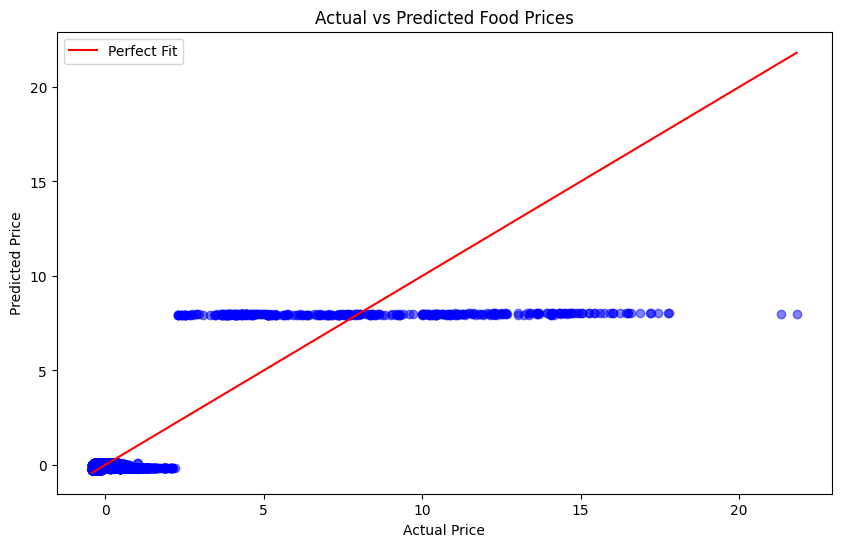

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Food Prices')
plt.legend()
plt.show()

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Absolute Error: {rf_mae}")
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")

Random Forest - Mean Absolute Error: 0.08576014495752947
Random Forest - Mean Squared Error: 0.11612860614539519
Random Forest - R-squared: 0.8943263105749919


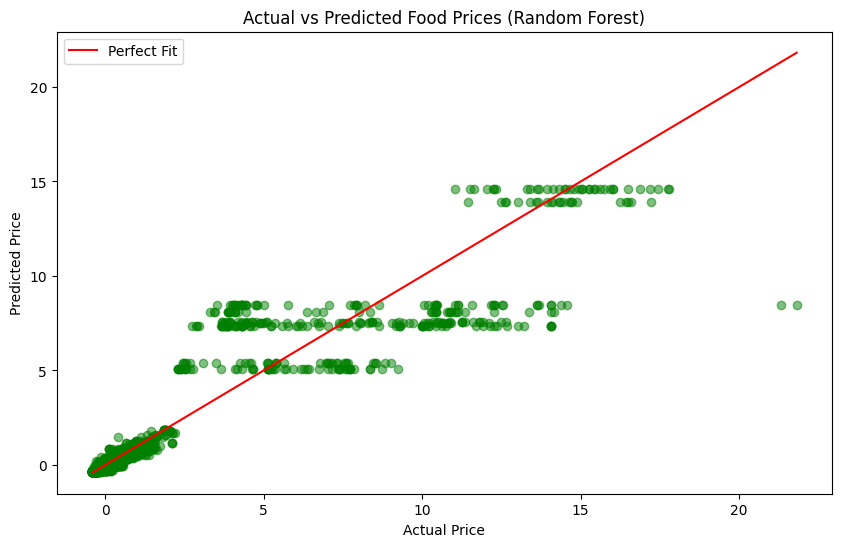

In [ ]:
# Plot actual vs predicted prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Food Prices (Random Forest)')
plt.legend()
plt.show()